<a href="https://colab.research.google.com/github/enes-karatas/AI_ML_test/blob/main/Data_Analysis_Project_AAL_Clothing_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAL Clothing Q4 Sales Analysis Project

AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.

Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. The specific tasks include:
Identify the states that are generating the highest revenues.
Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.


## Summary

- Analyzed Q4 sales data to provide investment insights and guide market expansion strategies for the upcoming year.
- Conducted data cleaning, wrangling, visualization, and reporting to identify the most profitable investment opportunities.


# Contents

### 1. Data Wrangling ( Analysis and Dataset Obervation Report )
### 2. Data Analysis ( Analysis , Weekly Report , Monthly Report , Quarterly Report and Data Analysis Report )
### 3. Data Visualization ( Analysis , Charts and Data Visualization Report )
### 4. Final Report
### 5. Summary

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df_raw = pd.read_csv('AusApparalSales4thQrt2020.csv')
# Raw data as data frame
#df_raw.head()

df = df_raw.copy(deep=True)
df # Data frame to work on
df.head(5)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


##1. Data Wrangling

In [ ]:
df.isnull().sum()

# No null value in dataset

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [ ]:
df.shape

# Dataset has 6 colummns and 7560 raws

(7560, 6)

In [ ]:
df.info()

# All datatypes are good except for the Date, we will cast it to date-time object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [ ]:
df.sample(10)

# lets run sample for couple times to visualize is there any weird stuff in dataframe

,Date,Time,State,Group,Unit,Sales
610,8-Oct-2020,Evening,NT,Women,6,15000
916,11-Oct-2020,Afternoon,TAS,Kids,4,10000
7530,30-Dec-2020,Afternoon,QLD,Women,7,17500
6063,13-Dec-2020,Morning,NT,Seniors,10,25000
6448,17-Dec-2020,Afternoon,NSW,Kids,20,50000
1820,22-Oct-2020,Evening,QLD,Kids,17,42500
846,11-Oct-2020,Afternoon,WA,Women,4,10000
3500,12-Nov-2020,Evening,QLD,Kids,13,32500
4584,25-Nov-2020,Morning,QLD,Kids,15,37500
4831,28-Nov-2020,Afternoon,VIC,Seniors,33,82500


In [ ]:
df.isna().sum()

# Amount of NaN values in dataset is zero

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [ ]:
df.notna().sum()

,0
Date,7560
Time,7560
State,7560
Group,7560
Unit,7560
Sales,7560


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Converting Date columns to date time dtype to make it more manipulatable

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Time,object
State,object
Group,object
Unit,int64
Sales,int64


In [ ]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [ ]:
# Dataset looks clean so far. No null values, missing or incorrect entries found

# Data is valuable so before decide to drop null values and lose data we try to fill them with something meaningful

# Treating Missing/Incorrect Datas

# If there are incorrect values :
# - We can replace them with NaN and we can follow below null value handling technics later with NaN

# If there are null values :
# - If there is another dataset that we can map to understand what null value would be then we use mapping to fill null values
# - Null values for units and sales can be filled with mean since those columns are numeric
# - Null values for dates could be filled with previous or next date after asertion applied on date column
# - For the time, state and group data we can fill null values with the values most occured if null amount is not very much. Also I think this is not the best approach so we can decide to not do this depend on the case.

# After all data corrections if there are still null values and they're not many then we can drop them


In [ ]:
'''
Dataset Obervation Report:

Dataset has 6 columns and 7560 rows.
No null values exist and no nonsense data obtained so far, dataset is pretty clean.
There are 2 Numerical, 3 Categorical and one date.time columns.
Some datatypes are castable for better memory usage but no need to take action since its a small dataset.
Dataset focuses on Sales and Unit data based on State, Group, Time. Some columns like Week, Month and Quarter data will be added later on

'''

'\nDataset Obervation Report:\n\nDataset has 6 columns and 7560 rows.\nNo null values exist and no nonsense data obtained so far, dataset is pretty clean.\nThere are 2 Numerical, 3 Categorical and one date.time columns.\nSome datatypes are castable for better memory usage but no need to take action since its a small dataset.\nDataset focuses on Sales and Unit data based on State, Group, Time. Some columns like Week, Month and Quarter data will be added later on\n\n'

In [ ]:
# Normalization Application on dataset

from sklearn.preprocessing import MinMaxScaler

scaler_min_max = MinMaxScaler()
numeric_columns = ['Unit', 'Sales']

normalized_df = pd.DataFrame(scaler_min_max.fit_transform(df[numeric_columns]), columns=numeric_columns)

print('Original Data : ')
print(df[numeric_columns])
# Original data columns are here

print('Normalized (Min-Max scaled) Data : ')
print(normalized_df)
# Data columns after Normalization applied here

# All data rows was scaled between 0-1 based on its original value
# Normalized values for both columns looks very identical


Original Data : 
      Unit  Sales
0        8  20000
1        8  20000
2        4  10000
3       15  37500
4        3   7500
...    ...    ...
7555    14  35000
7556    15  37500
7557    15  37500
7558    11  27500
7559    13  32500

[7560 rows x 2 columns]
Normalized (Min-Max scaled) Data : 
          Unit     Sales
0     0.095238  0.095238
1     0.095238  0.095238
2     0.031746  0.031746
3     0.206349  0.206349
4     0.015873  0.015873
...        ...       ...
7555  0.190476  0.190476
7556  0.206349  0.206349
7557  0.206349  0.206349
7558  0.142857  0.142857
7559  0.174603  0.174603

[7560 rows x 2 columns]


In [ ]:
# Groupby() is used for splitting data in a groups and then data analyze based on selected groups. For example in this dataset we can group with 'Time' and we can
# select 'Sales' column and with sum() function we can see total sales data based on group like how many sales done by Morning
# --> df.groupby('Time')['Sales'].mean() in here for example we can see average sales based on the time of the day

In [ ]:
df.groupby('Time')['Sales'].sum()

# On total, most sales happened in the mornings and then afternoon. Least total sales is happened in the evening

,Sales
Time,
Afternoon,114007500
Evening,112087500
Morning,114207500


In [ ]:
df.groupby('Time')['Sales'].mean()

# On average, most sales happened in the mornings and then afternoon. Least average sales is happened in the evening

,Sales
Time,
Afternoon,45241.071429
Evening,44479.166667
Morning,45320.436508


In [ ]:
df.groupby('Group')['Sales'].mean()

# On Average most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors

,Sales
Group,
Kids,45011.904762
Men,45370.370370
Seniors,44464.285714
Women,45207.671958


In [ ]:
df.groupby('Group')['Sales'].sum()

# On total most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


In [ ]:
df.groupby('State')['Sales'].sum()

# On total most sales done in VIC state and Least sales done in WA state

,Sales
State,
NSW,74970000
NT,22580000
QLD,33417500
SA,58857500
TAS,22760000
VIC,105565000
WA,22152500


In [ ]:
df.groupby('State')['Sales'].mean()

# On average most sales done in VIC state and Least sales done in WA state

,Sales
State,
NSW,69416.666667
NT,20907.407407
QLD,30942.129630
SA,54497.685185
TAS,21074.074074
VIC,97745.370370
WA,20511.574074


In [ ]:
'''
Data Insight Report:

On total and average, most sales happened in VIC state. Least total and average sales is happened in WA state
On total, most sales happened in the mornings and then afternoon. Least total sales is happened in the evening
On average, most sales happened in the mornings and then afternoon. Least average sales is happened in the evening
On total most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors
On average most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors

'''

'\nData Insight Report:\n\nOn total and average, most sales happened in VIC state. Least total and average sales is happened in WA state\nOn total, most sales happened in the mornings and then afternoon. Least total sales is happened in the evening\nOn average, most sales happened in the mornings and then afternoon. Least average sales is happened in the evening\nOn total most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors\nOn average most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors\n\n'

##2. Data Analysis

In [ ]:
df['Sales'].describe()

# Average amount of Sales is 45013 and Standard deviation is 32253
# Max sales amount is 162500 and min sales amount is 5000

,Sales
count,7560.000000
mean,45013.558201
std,32253.506944
min,5000.000000
25%,20000.000000
50%,35000.000000
75%,65000.000000
max,162500.000000


In [ ]:
df['Sales'].mode()
# Most occured amount of sale is 22500

,Sales
0,22500


In [ ]:
df['Unit'].describe()

# Average amount of Unit sold is 18 and Standart deviation is 13
# Max Unit sold is 65 and min Unit sold is 2

,Unit
count,7560.000000
mean,18.005423
std,12.901403
min,2.000000
25%,8.000000
50%,14.000000
75%,26.000000
max,65.000000


In [ ]:
df['Unit'].mode()

# Most occured unit of sale is 9

,Unit
0,9


In [ ]:
df.groupby('Group')['Sales'].max()

# On each sales basis, highest amount of sales was done by Seniors, Women and Kids equally and lowest was done by Men

,Sales
Group,
Kids,162500
Men,160000
Seniors,162500
Women,162500


In [ ]:
df.groupby('Group')['Sales'].sum()

# On total sales basis, highest amount of sale done by Men and lowest was done by Seniors

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


In [ ]:
print('Average sales based on state : ')
print(df.groupby('State')['Sales'].mean())
print()
print('Total sales based on state : ')
print(df.groupby('State')['Sales'].sum())

# On average most sales happened in VIC state and least sales happened in WA state
# On total most sales happened in VIC state and least sales happened in WA state
# In general VIC state sales is more than four time of WA state sales

Average sales based on state : 
State
NSW    69416.666667
NT     20907.407407
QLD    30942.129630
SA     54497.685185
TAS    21074.074074
VIC    97745.370370
WA     20511.574074
Name: Sales, dtype: float64

Total sales based on state : 
State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
# Adding day names column based on the date column

df['Week'] = df['Date'].dt.isocalendar().week
# Adding week numbers column based on the date column

df['Month'] = df['Date'].dt.month
# Adding Months numbers column based on the date column

df['Quarter'] = 'Q' + df['Date'].dt.quarter.astype(str)
# Adding Quarters column based on the date column


In [ ]:
df.sample(3)

,Date,Time,State,Group,Unit,Sales,DayOfWeek,Week,Month,Quarter
5471,2020-12-06,Evening,WA,Seniors,14,35000,Sunday,49,12,Q4
5649,2020-12-08,Evening,NT,Men,10,25000,Tuesday,50,12,Q4
2131,2020-10-26,Afternoon,SA,Seniors,33,82500,Monday,44,10,Q4


In [ ]:
# Weekly Analysis - Sales

df.groupby('Week')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Week,,,,,,,,
40,336.0,44776.785714,29293.076913,7500.0,22500.0,35000.0,65000.0,125000.0
41,588.0,45922.619048,29930.519460,7500.0,22500.0,37500.0,67500.0,125000.0
42,588.0,45306.122449,29928.788223,7500.0,22500.0,35000.0,65625.0,125000.0
43,588.0,45603.741497,29851.225988,7500.0,22500.0,35000.0,67500.0,125000.0
44,504.0,43268.849206,29887.407035,5000.0,20000.0,32500.0,65000.0,125000.0
45,588.0,35484.693878,27074.865046,5000.0,15000.0,25000.0,52500.0,112500.0
46,588.0,36007.653061,27243.357678,5000.0,15000.0,25000.0,55000.0,112500.0
47,588.0,35905.612245,27553.541234,5000.0,15000.0,25000.0,52500.0,112500.0
48,588.0,36526.360544,27787.488802,5000.0,15000.0,25000.0,55000.0,112500.0


In [ ]:
df.groupby('Week')['Unit'].describe()

,count,mean,std,min,25%,50%,75%,max
Week,,,,,,,,
40,336.0,17.910714,11.717231,3.0,9.0,14.0,26.00,50.0
41,588.0,18.369048,11.972208,3.0,9.0,15.0,27.00,50.0
42,588.0,18.122449,11.971515,3.0,9.0,14.0,26.25,50.0
43,588.0,18.241497,11.940490,3.0,9.0,14.0,27.00,50.0
44,504.0,17.307540,11.954963,2.0,8.0,13.0,26.00,50.0
45,588.0,14.193878,10.829946,2.0,6.0,10.0,21.00,45.0
46,588.0,14.403061,10.897343,2.0,6.0,10.0,22.00,45.0
47,588.0,14.362245,11.021416,2.0,6.0,10.0,21.00,45.0
48,588.0,14.610544,11.114996,2.0,6.0,10.0,22.00,45.0


<Axes: xlabel='Week', ylabel='Sales'>

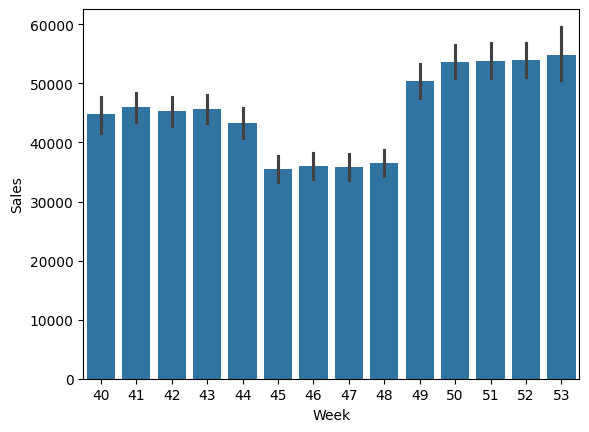

In [ ]:
# Weekly analysis visual on Sales

sns.barplot(data=df, x=df['Week'], y=df['Sales'])

<Axes: xlabel='Week', ylabel='Unit'>

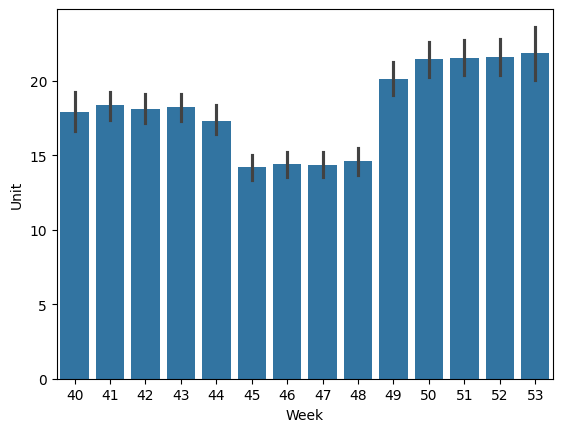

In [ ]:
# Weekly analysis visual on Units

sns.barplot(data=df, x=df['Week'], y=df['Unit'])

# Pattern is pretty same with sales and that makes sense since correlation between sales and units are very high

In [ ]:
'''
Weekly Analysis Report (ref. Chart 7. & Chart 8.)

Sales Analysis:
- Most sales was done in 53rd week as average 54732 , least sales was done in 44th week as average 43268 which 21% less then 53rd week
- Top sales was done in last four weeks(50-53), least sales was done in 45-48 weeks
- There is a significant decrease on average sales between weeks 44 to 45, %18 drop
- There is a significant increase on average sales between week 48 to 49, %38 increase
- If we can group these with similarity each other's averages based on timeline :
  - Week 40-44 is first group as middle sales
  - Week 45-48 is second group as low sales
  - Week 49-53 is third group as high sales

Unit Analysis:
- Most units sold in 53rd week as average 21.89 and between 50-53 weeks are in 21s ,
- Least units sold was done in 44th week as average 14.49 which 34% less then 53rd week and between 45th-48th are in also 14s
- There is a significant decrease on average unit sold between weeks 44 to 45, %17 drop
- There is a significant increase on average unit sold between week 48 to 49, %43 increase
'''

"\nWeekly Analysis Report (ref. Chart 7. & Chart 8.)\n\nSales Analysis:\n- Most sales was done in 53rd week as average 54732 , least sales was done in 44th week as average 43268 which 21% less then 53rd week\n- Top sales was done in last four weeks(50-53), least sales was done in 45-48 weeks\n- There is a significant decrease on average sales between weeks 44 to 45, %18 drop\n- There is a significant increase on average sales between week 48 to 49, %38 increase\n- If we can group these with similarity each other's averages based on timeline :\n  - Week 40-44 is first group as middle sales\n  - Week 45-48 is second group as low sales\n  - Week 49-53 is third group as high sales\n\nUnit Analysis:\n- Most units sold in 53rd week as average 21.89 and between 50-53 weeks are in 21s ,\n- Least units sold was done in 44th week as average 14.49 which 34% less then 53rd week and between 45th-48th are in also 14s\n- There is a significant decrease on average unit sold between weeks 44 to 45, %17

In [ ]:
# Monthly Analysis

df.groupby('Month')['Sales'].describe()


,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
10,2520.0,45353.174603,29861.302213,7500.0,22500.0,35000.0,67500.0,125000.0
11,2520.0,35985.119048,27366.175823,5000.0,15000.0,25000.0,55000.0,112500.0
12,2520.0,53702.380952,36385.451298,12500.0,25000.0,37500.0,77500.0,162500.0


In [ ]:
df.groupby('Month')['Unit'].describe()


,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
10,2520.0,18.141270,11.944521,3.0,9.0,14.0,27.0,50.0
11,2520.0,14.394048,10.946470,2.0,6.0,10.0,22.0,45.0
12,2520.0,21.480952,14.554181,5.0,10.0,15.0,31.0,65.0


<Axes: xlabel='Month', ylabel='Sales'>

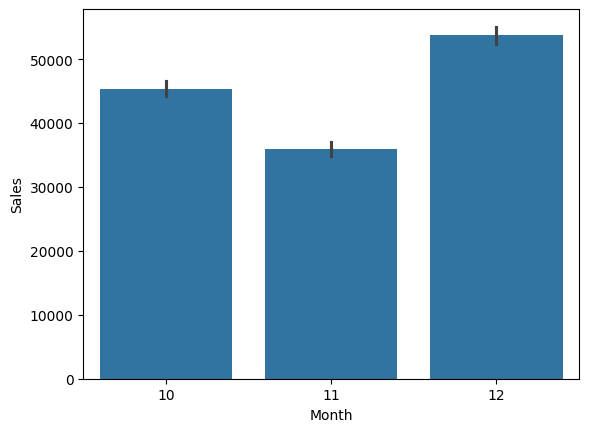

In [ ]:
# Monthly analysis visual

sns.barplot(data=df, x=df['Month'], y=df['Sales'])

In [ ]:
'''
Monthly Analysis Report (includes only 10th, 11th and 12th months, ref. Chart 9. & Chart 10.)

Sales Analysis:
- Most sales was done in 12th month as average 53702 , least sales was done in 11th month as average 35985 which 33% less then 12th month
- There is a decrease on average sales between months 10 to 11, %21 drop
- There is a increase on average sales between  months 11 to 12, %49 increase

Unit Analysis:
- Most units sold in 12th month as average 21 , least sales was done in 11th month as average 14 which 33% less then 12th month
- There is a decrease on average unit sold between months 10 to 11, %22 drop
- There is a increase on average sales between  months 11 to 12, %50 increase

'''

'\nMonthly Analysis Report (includes only 10th, 11th and 12th months, ref. Chart 9. & Chart 10.)\n\nSales Analysis:\n- Most sales was done in 12th month as average 53702 , least sales was done in 11th month as average 35985 which 33% less then 12th month\n- There is a decrease on average sales between months 10 to 11, %21 drop\n- There is a increase on average sales between  months 11 to 12, %49 increase\n\nUnit Analysis:\n- Most units sold in 12th month as average 21 , least sales was done in 11th month as average 14 which 33% less then 12th month\n- There is a decrease on average unit sold between months 10 to 11, %22 drop\n- There is a increase on average sales between  months 11 to 12, %50 increase\n\n'

In [ ]:
# Quarter Analysis

df.groupby('Quarter')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Quarter,,,,,,,,
Q4,7560.0,45013.558201,32253.506944,5000.0,20000.0,35000.0,65000.0,162500.0


In [ ]:
df.groupby('Quarter')['Unit'].describe()

,count,mean,std,min,25%,50%,75%,max
Quarter,,,,,,,,
Q4,7560.0,18.005423,12.901403,2.0,8.0,14.0,26.0,65.0


In [ ]:
'''
Quarterly Analysis Report ( includes only fourth quarter of the year (Q4), ref. Chart 11. & Chart 12.)

Sales Analysis:
- On average, sales for Q4 is 45013 with standart deviation of 32253
- Min sales value is 5000 and max is 162500
- 50% of the sales is above 35000 and 75% of the sales is above 65000

Unit Analysis:
- On average, units sold for Q4 is 18 with standart deviation of 12
- Min units sold value is 2 and max is 65
- 50% of the sales is above 14 and 75% of the sales is above 26

'''

'\nQuarterly Analysis Report ( includes only fourth quarter of the year (Q4), ref. Chart 11. & Chart 12.)\n\nSales Analysis:\n- On average, sales for Q4 is 45013 with standart deviation of 32253\n- Min sales value is 5000 and max is 162500\n- 50% of the sales is above 35000 and 75% of the sales is above 65000\n\nUnit Analysis:\n- On average, units sold for Q4 is 18 with standart deviation of 12\n- Min units sold value is 2 and max is 65\n- 50% of the sales is above 14 and 75% of the sales is above 26\n\n'

In [ ]:
'''
Data Analysis Report (General):

- Average amount of Sales is 45013 and Standard deviation is 32253
- Max sales amount is 162500 and min sales amount is 5000
- Most occured amount of sale is 22500
- Average amount of Unit sold is 18 and Standard deviation is 13
- Max Unit sold is 65 and min Unit sold is 2
- Most occured unit of sale is 9
- On each sales basis, highest amount of sales was done by Seniors, Women and Kids equally and lowest was done by Men
- On total sales basis, highest amount of sale done by Men and lowest was done by Seniors
- On average most sales happened in VIC state and least sales happened in WA state
- On total most sales happened in VIC state and least sales happened in WA state
- In general VIC state sales is more than four time of WA state sales

'''

'\nData Analysis Report (General):\n\n- Average amount of Sales is 45013 and Standard deviation is 32253\n- Max sales amount is 162500 and min sales amount is 5000\n- Most occured amount of sale is 22500\n- Average amount of Unit sold is 18 and Standard deviation is 13\n- Max Unit sold is 65 and min Unit sold is 2\n- Most occured unit of sale is 9\n- On each sales basis, highest amount of sales was done by Seniors, Women and Kids equally and lowest was done by Men\n- On total sales basis, highest amount of sale done by Men and lowest was done by Seniors\n- On average most sales happened in VIC state and least sales happened in WA state\n- On total most sales happened in VIC state and least sales happened in WA state\n- In general VIC state sales is more than four time of WA state sales\n\n'

##3. Data Visualization

In [ ]:
df.head()

,Date,Time,State,Group,Unit,Sales,DayOfWeek,Week,Month,Quarter
0,2020-10-01,Morning,WA,Kids,8,20000,Thursday,40,10,Q4
1,2020-10-01,Morning,WA,Men,8,20000,Thursday,40,10,Q4
2,2020-10-01,Morning,WA,Women,4,10000,Thursday,40,10,Q4
3,2020-10-01,Morning,WA,Seniors,15,37500,Thursday,40,10,Q4
4,2020-10-01,Afternoon,WA,Kids,3,7500,Thursday,40,10,Q4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating State based new dataframe to have grouping for State and Group
grouped_state_group_df = df.groupby(['State','Group'])['Sales'].mean().reset_index()
# Creating Group based new dataframe to have grouping for Group and State
grouped_group_state_df = df.groupby(['Group','State'])['Sales'].mean().reset_index()

# Adding new column by merging state and group
grouped_state_group_df['State_Group'] = grouped_state_group_df['State'] + ' - ' + grouped_state_group_df['Group']
# Adding new column by merging group and state
grouped_group_state_df['Group_State'] = grouped_group_state_df['Group'] + ' - ' + grouped_group_state_df['State']

print(grouped_state_group_df.head(3))
print()
print(grouped_group_state_df.head(3))

  State     Group         Sales      State_Group
0   NSW      Kids  68842.592593      NSW -  Kids
1   NSW       Men  70453.703704       NSW -  Men
2   NSW   Seniors  67361.111111   NSW -  Seniors

   Group State         Sales   Group_State
0   Kids   NSW  68842.592593   Kids -  NSW
1   Kids    NT  21111.111111    Kids -  NT
2   Kids   QLD  31518.518519   Kids -  QLD


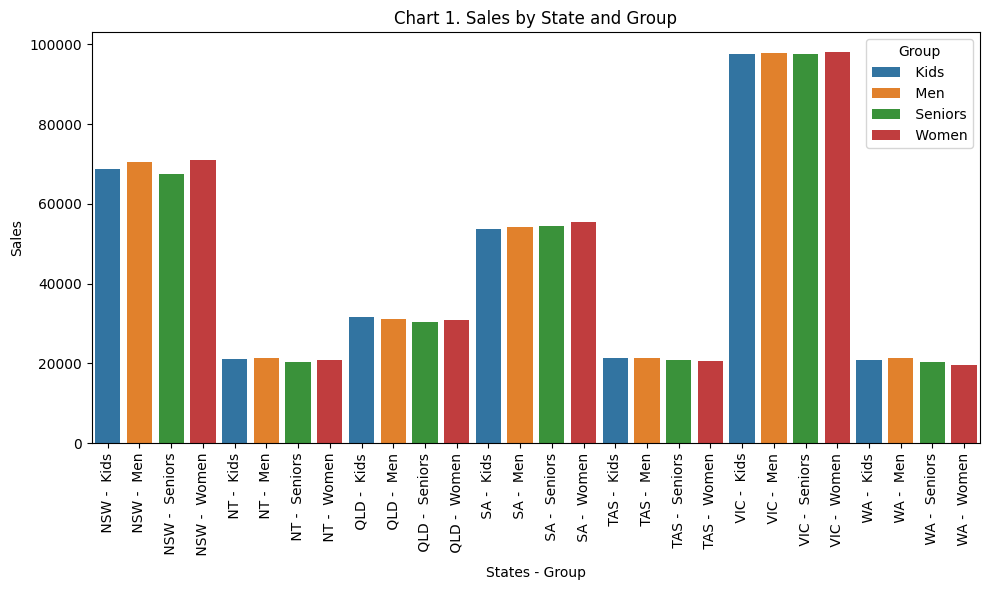

In [ ]:
# State-wise sales analysis

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_state_group_df, x='State_Group', y='Sales', hue='Group')
plt.xticks(rotation=90)
plt.xlabel('States - Group')
plt.title('Chart 1. Sales by State and Group')
plt.tight_layout()
plt.show()


# Most sales happened in VIC state, least sales happened in WA state, VIC state sales is more than four time of WA state sales
# Group sales amount differs based on the state
# In general there is no big difference between groups but there is big difference between states

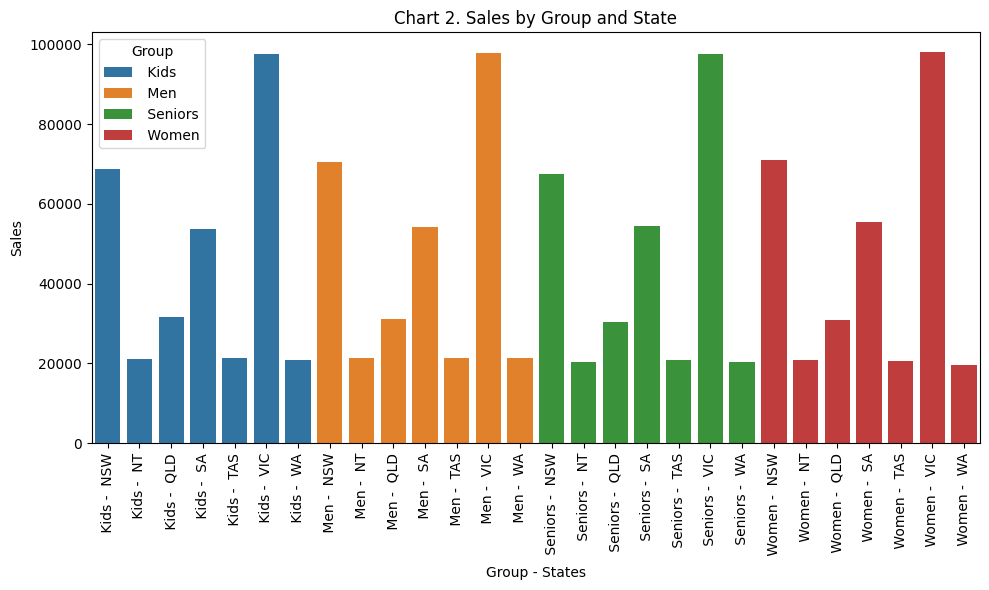

In [ ]:
# Group-wise sales analysis

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_group_state_df, x='Group_State', y='Sales', hue='Group')
plt.xticks(rotation=90)
plt.xlabel('Group - States')
plt.title('Chart 2. Sales by Group and State')
plt.tight_layout()
plt.show()

# Group sales varies based on the state
# We can say state has more effective role on sales than group
# #Suggestion : Sales team can focus on state data instead of group data

In [ ]:
# Time-of-the-day analysis

# First lets see numeric values

print(df.groupby('Time')['Sales'].mean())
print()
print(df.groupby('Time')['Sales'].sum())

Time
Afternoon    45241.071429
Evening      44479.166667
Morning      45320.436508
Name: Sales, dtype: float64

Time
Afternoon    114007500
Evening      112087500
Morning      114207500
Name: Sales, dtype: int64


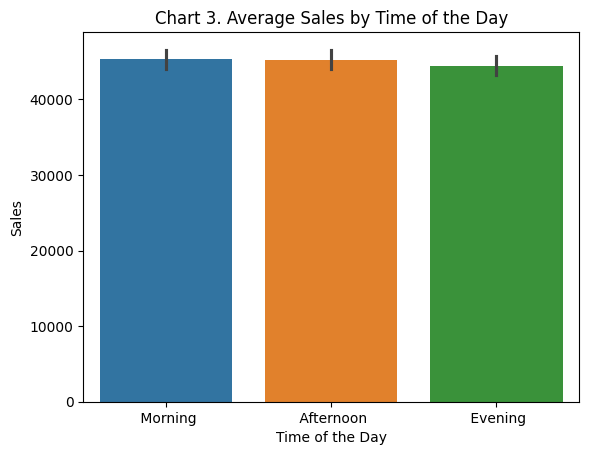

In [ ]:
# Barplot to show average sales distribution per period of the day

sns.barplot(data=df, x=df['Time'], y=df['Sales'], hue='Time')

plt.xlabel('Time of the Day')
plt.title('Chart 3. Average Sales by Time of the Day')
plt.show()

# On average Morning is Highest scores on sales, Evening has Lowest scores on sales
# In general there is no significant difference on sales amount based on time of the day

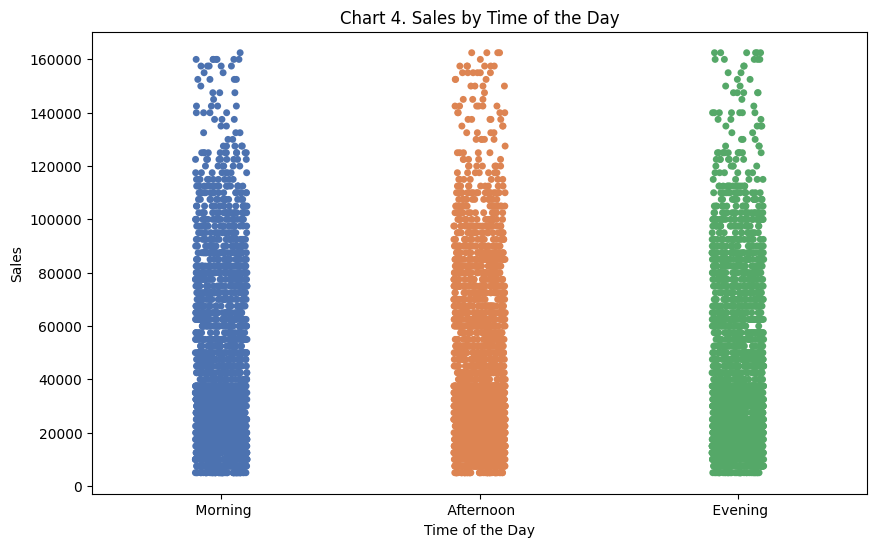

In [ ]:
# Stripplot to show distribution of sales amounts per period of the day

plt.figure(figsize=(10,6))
sns.stripplot(data=df, x=df['Time'], y=df['Sales'],jitter=True, hue='Time',palette='deep')

plt.xlabel('Time of the Day')
plt.title('Chart 4. Sales by Time of the Day')
plt.show()

# High value sales mostly happened Afternoon and Evening

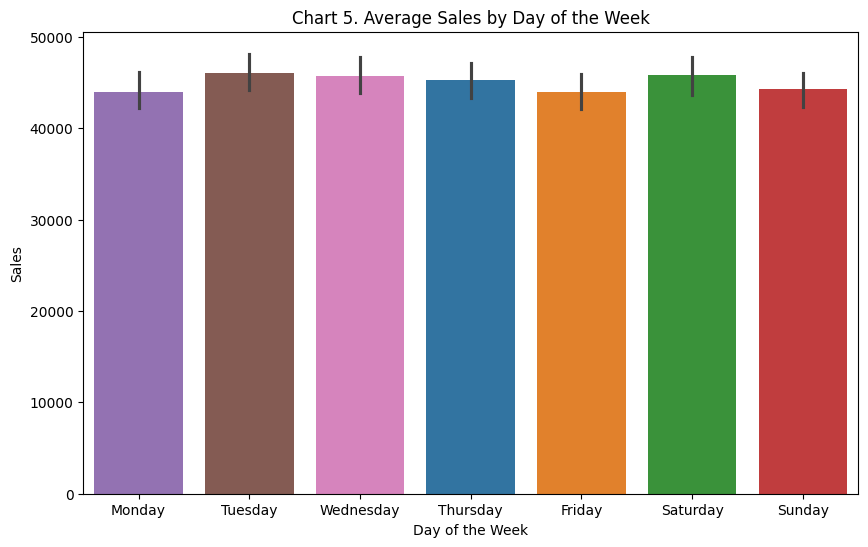

In [ ]:
# Daily Sales Visualizations

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.barplot(data=df, x=df['DayOfWeek'], y=df['Sales'], order=weekday_order , hue='DayOfWeek')

plt.xlabel('Day of the Week')
plt.title('Chart 5. Average Sales by Day of the Week')
plt.show()

# Most sales happened in Tuesday, least sales happened in Friday

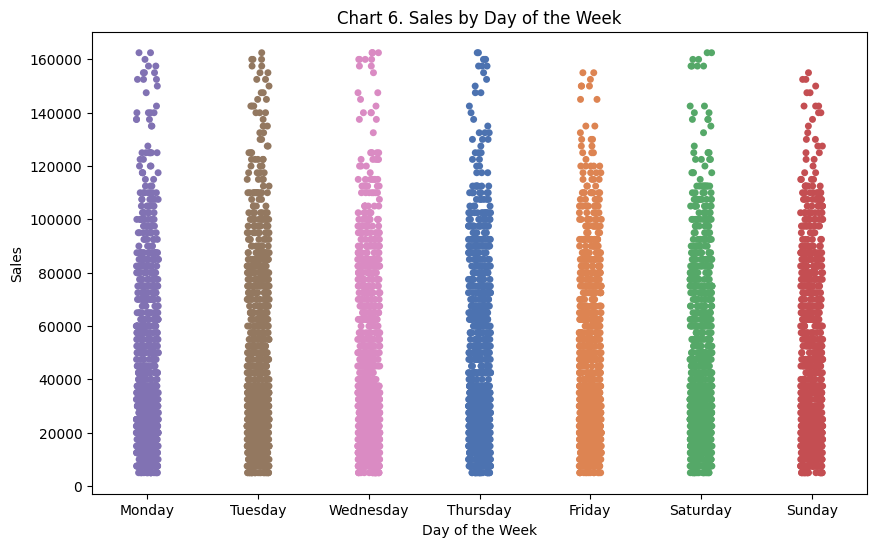

In [ ]:

# Daily Sales Visualizations

plt.figure(figsize=(10,6))
sns.stripplot(data=df, x=df['DayOfWeek'], y=df['Sales'],jitter=True, hue='DayOfWeek',palette='deep', order=weekday_order)

plt.xlabel('Day of the Week')
plt.title('Chart 6. Sales by Day of the Week')
plt.show()

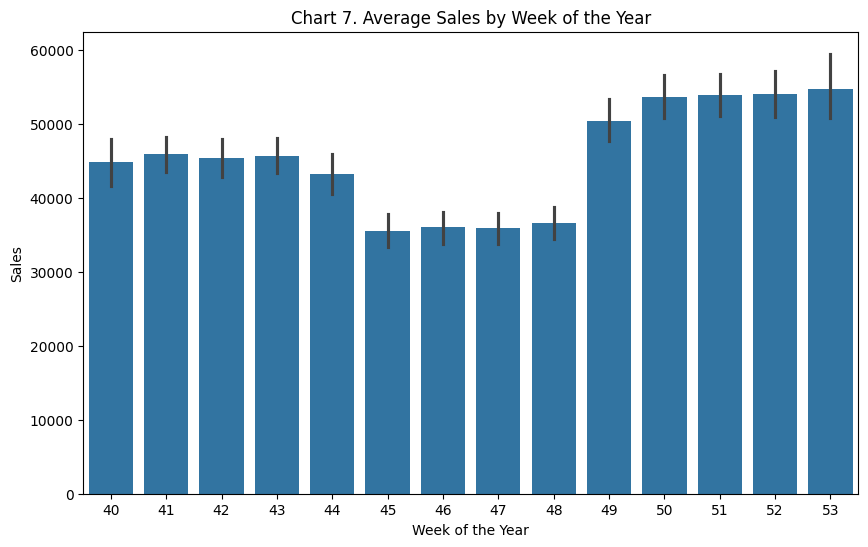

In [ ]:
# Weekly Sales Visualizations

plt.figure(figsize=(10,6))
sns.barplot(data=df, x=df['Week'], y=df['Sales'])

plt.xlabel('Week of the Year')
plt.title('Chart 7. Average Sales by Week of the Year')
plt.show()

# In average most sales happened in 53rd week and least happened in 45th week

/tmp/ipython-input-181-2547507569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x=df['Week'], y=df['Sales'],jitter=True,palette='deep')


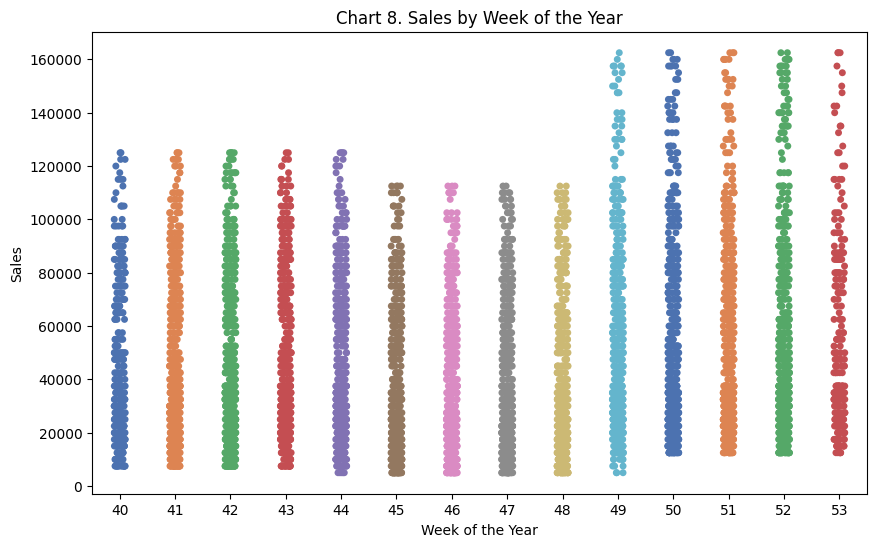

In [ ]:
# Weekly Sales Visualizations

plt.figure(figsize=(10,6))
sns.stripplot(data=df, x=df['Week'], y=df['Sales'],jitter=True,palette='deep')

plt.xlabel('Week of the Year')
plt.title('Chart 8. Sales by Week of the Year')
plt.show()

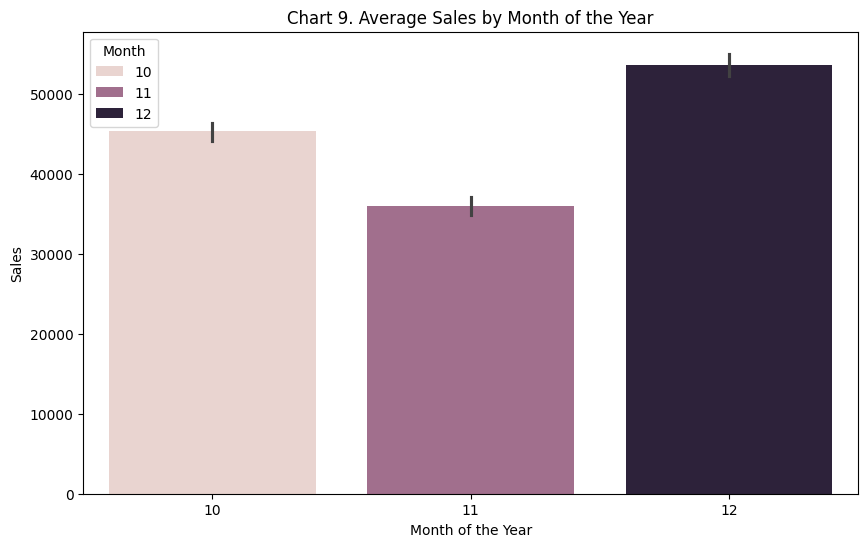

In [ ]:
# Monthly Sales Visualizations

plt.figure(figsize=(10,6))
sns.barplot(data=df, x=df['Month'], y=df['Sales'] , hue='Month')

plt.xlabel('Month of the Year')
plt.title('Chart 9. Average Sales by Month of the Year')
plt.show()

# In last quarter most of the sales happened in December, least happened in November

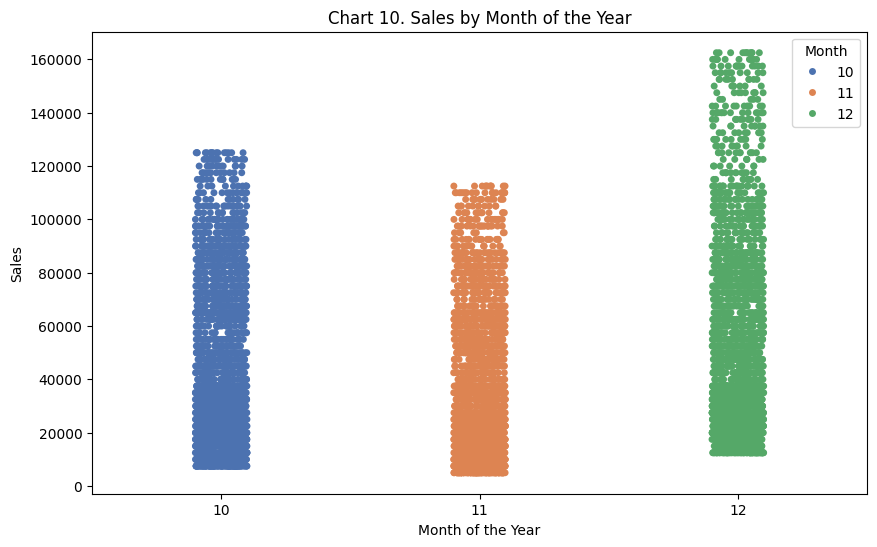

In [ ]:
# Monthly Sales Visualizations

plt.figure(figsize=(10,6))
sns.stripplot(data=df, x=df['Month'], y=df['Sales'],jitter=True, hue='Month',palette='deep')

plt.xlabel('Month of the Year')
plt.title('Chart 10. Sales by Month of the Year')
plt.show()

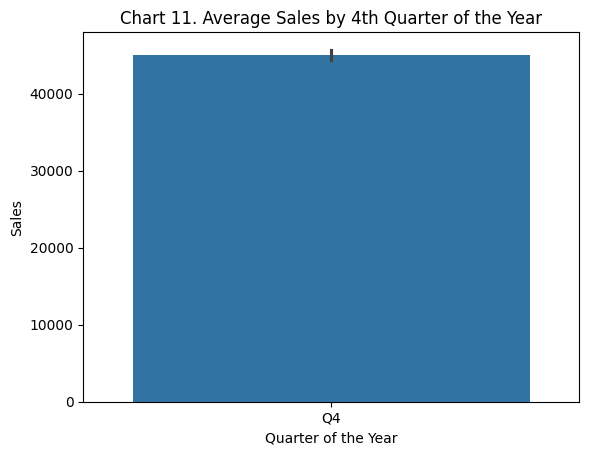

In [ ]:
# Quarterly Sales Visualizations
# Note : Only last quarter(Q4) exist in dataset

sns.barplot(data=df, x=df['Quarter'], y=df['Sales'])

plt.xlabel('Quarter of the Year')
plt.title('Chart 11. Average Sales by 4th Quarter of the Year')
plt.show()

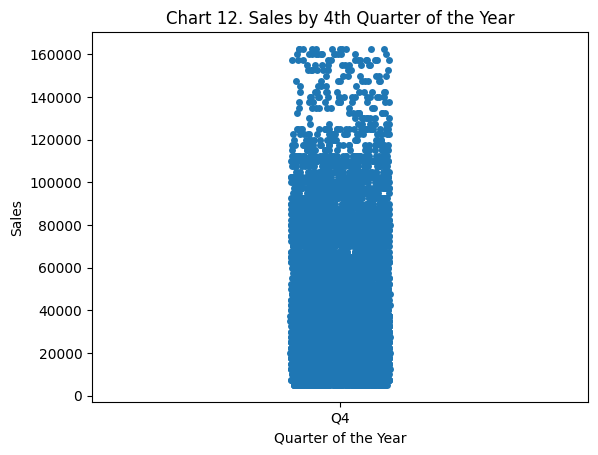

In [ ]:
# Quarterly Sales Visualizations

sns.stripplot(data=df, x=df['Quarter'], y=df['Sales'], jitter=True)

plt.xlabel('Quarter of the Year')
plt.title('Chart 12. Sales by 4th Quarter of the Year')
plt.show()

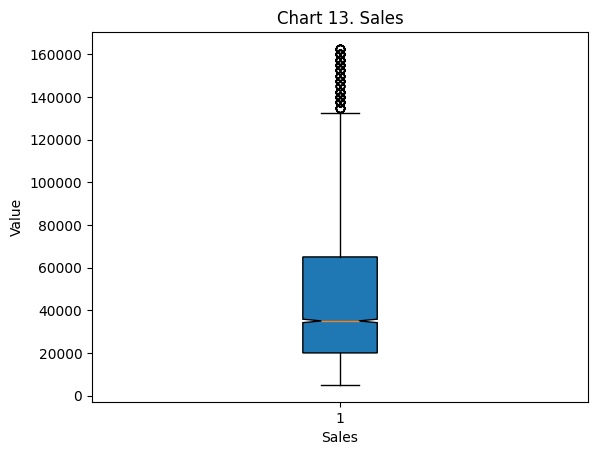

In [ ]:
plt.boxplot( data=df,x=df['Sales'],patch_artist=True, notch=True  )

plt.xlabel('Sales')
plt.ylabel('Value')
plt.title('Chart 13. Sales')
plt.show()

# Boxplot to see Sales data's average and outliers

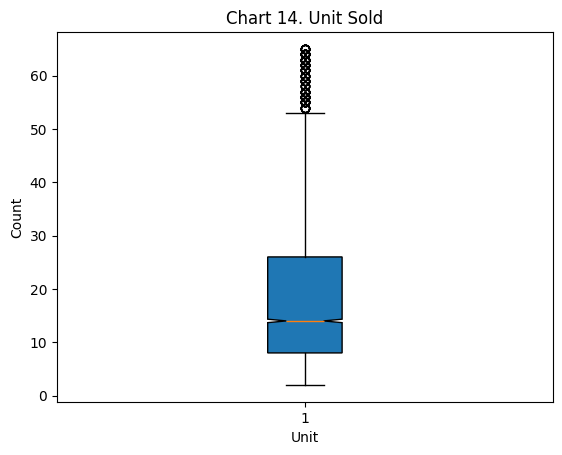

In [ ]:
plt.boxplot( data=df,x=df['Unit'],patch_artist=True, notch=True  )

plt.xlabel('Unit')
plt.ylabel('Count')
plt.title('Chart 14. Unit Sold')
plt.show()

# Boxplot to see Unit sold data's average and outliers

In [ ]:
# Visualization package selection:

# I've choosen Matplotlib and Seaborn as visualization package because necessary visulations for this study is barplot, stripplot and boxplot to visualize data efficiently.
# All visualization actions I need is covered by Matplotlib and Seaborn packages.
# Plotly can be used to show some numeric values on graphs but not needed so far.

In [ ]:
'''
Data Visualization Report :

- Most sales happened in VIC state, least sales happened in WA state, VIC state sales is more than four time of WA state sales, ref. Chart 1.
- Group sales amount varies based on the state, ref. Chart 2.
- In general there is no big difference between groups, ref. Chart 1.
- We can say state has more effective role on sales than group, ref. Chart1. vs Chart 2.
- On average Morning is Highest scores on sales, Evening has Lowest scores on sales, ref. Chart 3.
- In general there is no significant difference on sales amount based on time of the day, ref. Chart 3.
- High value sales mostly happened Afternoon and Evening, ref. Chart 4.
- Most sales happened in Tuesday, least sales happened in Friday, ref. Chart5.
- In average most sales happened in 53rd week and least happened in 45th week, ref. Chart 7.
- In last quarter most of the sales happened in December, least happened in November, ref. Chart 9.

# Suggestion : Sales team can focus on state data instead of group data because state data has way more effect on sales than group.
# Suggestion : Sales team can focus on Week or Month data because there are significicant differences on sales amount based on Week or Month data.

'''

'\nData Visualization Report :\n\n- Most sales happened in VIC state, least sales happened in WA state, VIC state sales is more than four time of WA state sales, ref. Chart 1.\n- Group sales amount varies based on the state, ref. Chart 2.\n- In general there is no big difference between groups, ref. Chart 1.\n- We can say state has more effective role on sales than group, ref. Chart1. vs Chart 2.\n- On average Morning is Highest scores on sales, Evening has Lowest scores on sales, ref. Chart 3.\n- In general there is no significant difference on sales amount based on time of the day, ref. Chart 3.\n- High value sales mostly happened Afternoon and Evening, ref. Chart 4.\n- Most sales happened in Tuesday, least sales happened in Friday, ref. Chart5.\n- In average most sales happened in 53rd week and least happened in 45th week, ref. Chart 7.\n- In last quarter most of the sales happened in December, least happened in November, ref. Chart 9.\n\n# Suggestion : Sales team can focus on state

#4. Final Report

##Dataset Observation Report

- Dataset has 6 columns and 7560 rows.
- No null values exist and no nonsense data obtained so far, dataset is pretty clean.
- There are 2 Numerical, 3 Categorical and one date.time columns.
- Some datatypes are castable for better memory usage but no need to take action since its a small dataset.
- Dataset focuses on Sales and Unit data based on State, Group, Time. Some columns was added later on like Week, Month and Quarter data for deeper analysis.


## Data Analysis Report

- Average amount of Sales is 45013 and Standard deviation is 32253
- Max sales amount is 162500 and min sales amount is 5000
- Most occured amount of sale is 22500
- Average amount of Unit sold is 18 and Standard deviation is 13
- Max Unit sold is 65 and min Unit sold is 2
- Most occured unit of sale is 9
- On each sales basis, highest amount of sales was done by Seniors, Women and Kids equally and lowest was done by Men
- On total, most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors
- On average, most sales done by Men then follows Women and Kids respectively. Least sales done by Seniors
- On total, most sales happened in VIC state and least sales happened in WA state
- On average, most sales happened in VIC state and least sales happened in WA state
- In general, VIC state sales is more than four time of WA state sales
- On total, most sales happened in the mornings and then afternoon. Least total sales is happened in the evening
- On average, most sales happened in the mornings and then afternoon. Least average sales is happened in the evening.

####1. Weekly Analysis Report (ref. Chart 7. & Chart 8.) :

Sales Analysis:
- Most sales was done in 53rd week as average 54732 , least sales was done in 44th week as average 43268 which 21% less then 53rd week
- Top sales was done in last four weeks(50-53), least sales was done in 45-48 weeks
- There is a significant decrease on average sales between weeks 44 to 45, %18 drop
- There is a significant increase on average sales between week 48 to 49, %38 increase
- If we can group these with similarity each other's averages based on timeline :
  - Week 40-44 is first group as middle sales
  - Week 45-48 is second group as low sales
  - Week 49-53 is third group as high sales

Unit Analysis:
- Most units sold in 53rd week as average 21.89 and between 50-53 are also in 21s
- Least units sold was done in 44th week as average 14.49 which 34% less then 53rd week and between 45th-48th are also in 14s
- There is a significant decrease on average unit sold between weeks 44 to 45, %17 drop
- There is a significant increase on average unit sold between week 48 to 49, %43 increase



####2. Monthly Analysis Report (includes only 10th, 11th and 12th months, ref. Chart 9. & Chart 10.) :

Sales Analysis:
- Most sales was done in 12th month as average 53702 , least sales was done in 11th month as average 35985 which 33% less then 12th month
- There is a decrease on average sales between months 10 to 11, %21 drop
- There is a increase on average sales between  months 11 to 12, %49 increase

Unit Analysis:
- Most units sold in 12th month as average 21 , least sales was done in 11th month as average 14 which 33% less then 12th month
- There is a decrease on average unit sold between months 10 to 11, %22 drop
- There is a increase on average sales between  months 11 to 12, %50 increase


####3. Quarterly Analysis Report ( includes only fourth quarter of the year (Q4), ref. Chart 11. & Chart 12.)

Sales Analysis:
- On average, sales for Q4 is 45013 with standart deviation of 32253
- Min sales value is 5000 and max is 162500
- 50% of the sales is above 35000 and 75% of the sales is above 65000

Unit Analysis:
- On average, units sold for Q4 is 18 with standart deviation of 12
- Min units sold value is 2 and max is 65
- 50% of the sales is above 14 and 75% of the sales is above 26

##Data Visualization Report

- Most sales happened in VIC state, least happened in WA state, VIC state sales is more than four time of WA state sales, ref. Chart 1.
- Group sales amount varies based on the state, ref. Chart 2.
- In general, there is no big difference in sales amount between groups, ref. Chart 1.
- We can say state has more effective role on sales than group, ref. Chart1. vs Chart 2.
- On average, Morning is Highest scores on sales, Evening has Lowest scores on sales, ref. Chart 3.
- In general, there is no significant difference on sales amount based on time of the day, ref. Chart 3.
- High value sales mostly happened in Afternoon and Evening, ref. Chart 4.
- Most sales happened in Tuesday, least sales happened in Friday, ref. Chart5.
- In average most sales happened in 53rd week and least happened in 45th week, ref. Chart 7.
- In last quarter most of the sales happened in December, least happened in November, ref. Chart 9.

##### Suggestion : Sales team can primarily focus on state data instead of group data because state data has way more effect on sales than group.
##### Suggestion : Sales team can focus on Week and Month data because there are significicant differences on sales amount based on Week or Month data.

#5. Summary

- Average amount of Sales is 45013, max sales amount is 162500 and min sales amount is 5000, most occured amount of sale is 22500
- Average amount of Unit sold is 18 and Standard deviation is 13, Max Unit sold is 65 and min Unit sold is 2, Most occured unit of sale is 9
- On group basis on sales, there is NO significant difference between groups
- ** On State basis on sales there is significant differences, most sales happened in VIC state and least sales happened in WA state, VIC state sales is more than four time of WA state sales
- ** On State basis on units sold there is significant differences, most units sold in VIC state and least units sold in WA state, VIC state units sold is more than four time of WA state sales
- On time basis there is NO significant differences, most sales happened in the mornings and then afternoon. Least total sales is happened in the evening
- ** On weekly basis on sales there is significant differences, in average most sales happened in 53rd week and least happened in 45th week which 21% less then 53rd week
- ** On weekly basis on units there is significant differences, in average most units sold in 53rd week and least happened in 45th week which 34% less then 53rd week
- ** On monthly basis on sales there is significant differences, most sales was done in 12th month and least sales was done in 11th month which 33% less then 12th month
- ** On monthly basis on units sold there is significant differences, most sales was done in 12th month and least sales was done in 11th month which 33% less then 12th month

##### Suggestion : Sales team can focus on state data primarily instead of group data because state data has way more effect on sales than group.(ref. Chart 1.)
##### Suggestion : Sales team can focus on Week and Month data because there are significicant differences on sales amount based on Week or Month data.